# NewsQA

## 1. Import Dataset and examination

In [1]:
pip install -U matplotlib
pip install datasets evaluate transformers[sentencepiece]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import json
from pandas import json_normalize

In [3]:
# load JSON document into python
with open('Dataset/archive/combined-newsqa-data-v1.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [4]:
# create Dataframe by normalizing JSON file and give only needed fields
FIELDS = ["text", "q", "consensus.s", "consensus.e", "isAnswerAbsent", "isQuestionBad"]
df = pd.json_normalize(data["data"], record_path=["questions"], meta=["text"])
dataset = df[FIELDS]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119633 entries, 0 to 119632
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            119633 non-null  object 
 1   q               119633 non-null  object 
 2   consensus.s     85193 non-null   float64
 3   consensus.e     85193 non-null   float64
 4   isAnswerAbsent  119633 non-null  float64
 5   isQuestionBad   107861 non-null  float64
dtypes: float64(4), object(2)
memory usage: 5.5+ MB


In [6]:
# examine how many questions are seen as bad
dataset["isQuestionBad"].value_counts()

0.000000    87810
0.333333     7013
1.000000     6646
0.500000     3494
0.666667     1802
0.250000      743
0.200000      175
0.750000       76
0.400000       48
0.166667       24
0.600000       19
0.800000        7
0.181818        1
0.142857        1
0.833333        1
0.125000        1
Name: isQuestionBad, dtype: int64

In [7]:
# look at some examples of bad questions
list[dataset[dataset["isQuestionBad"]>0.5].sample(n=10, random_state=3)["q"]]

list[45951     what is Susan Orlean is known for "The Orchid ...
107328    Qui impedit praesentium architecto sint volupt...
75147     Iure nostrud eum est praesentium autem occaeca...
102081              Who was shot by an unidentified gunman?
7144                           k production is an ecologica
96209                 with blue or green graphics; sold fro
86209               drilling ... has no business in an urba
78827                         ho resort suffered similar da
77780                    What prosecute the Criminal Court?
40600                  Hat we need before hitting the road?
Name: q, dtype: object]

In [8]:
# replace NaN with 0
dataset["consensus.s"] = dataset["consensus.s"].fillna(0)
dataset["consensus.e"] = dataset["consensus.e"].fillna(0)

/tmp/ipykernel_1273/2432071688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["consensus.s"] = dataset["consensus.s"].fillna(0)
/tmp/ipykernel_1273/2432071688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["consensus.e"] = dataset["consensus.e"].fillna(0)


In [9]:
# clean dataset of bad questions
dataset = dataset[dataset["isQuestionBad"]==0.0]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87810 entries, 0 to 119632
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            87810 non-null  object 
 1   q               87810 non-null  object 
 2   consensus.s     87810 non-null  float64
 3   consensus.e     87810 non-null  float64
 4   isAnswerAbsent  87810 non-null  float64
 5   isQuestionBad   87810 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.7+ MB


In [10]:
# add 2 columns for question and text length
dataset["q_length"] = dataset["q"].apply(lambda x: len(str(x).split()))
dataset["text_length"] = dataset["text"].apply(lambda x: len(str(x).split()))

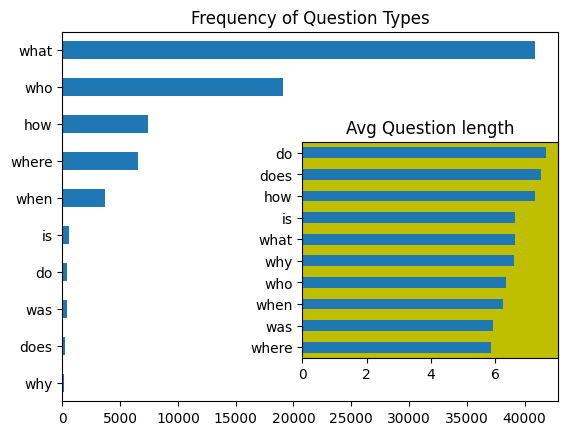

In [11]:
# examine the dataset, frequency of question types
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

counts = {}
avg_length = {}
question_types = ["what", "how", "is", "does", "do", "was", "where", "why", "when", "who"]
dataset["q"] = dataset["q"].str.lower()

for q in question_types:
    counts[q] = dataset["q"].str.startswith(q).value_counts()[True]
    avg_length[q] = dataset[dataset["q"].str.startswith(q)==True]["q_length"].sum()/counts[q]

pd.Series(counts).sort_values().plot.barh()
plt.title("Frequency of Question Types")

a = plt.axes([.5, .2, .4, .45], facecolor='y')
pd.Series(avg_length).sort_values().plot.barh()
plt.title("Avg Question length")

plt.show()

In [12]:
# imports to use iplot on Dataframe.Series
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [13]:
# plot the question length and see potential outliars
%matplotlib notebook
dataset['q_length'].iplot(
    kind='hist',
    bins=100,
    xTitle='Question length',
    linecolor='black',
    yTitle='count',
    title='Question Text Length Distribution')

In [14]:
# plot text length after dropping the duplicates from dataframe
dataset_text = dataset.drop_duplicates(subset=["text"])

dataset_text['text_length'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Text Word Count Distribution')

In [15]:
# examine very long questions
list(dataset[dataset["q_length"]>30]["q"])

['video? why did the police release the video? why did the police release the video?why did the police release the video? why did the police release the video? why did the police release the video? why did the police release the video? why did the police release the video? why did the police release the video?why did the police release the video? why did the police release the video? why did the police release the video? why did the police release the video? why did the police release the video? why did the police release the video?lease the video? why did the police release the video? why did the police release the video? why did the police release the video? why did the police release the video?',
 'trashe, south african media reports reports says anc has 65 percent of vote; official results expected saturday opposition democratic alliance could claim control of western cape province controversial anc leader jacob zuma expected to become president q1:',
 "pedestrian struck twice, dra

In [16]:
# delete those long questions as they bring no value
dataset = dataset[dataset["q_length"]<30]

In [17]:
# plot question length again
dataset['q_length'].iplot(
    kind='hist',
    bins=100,
    xTitle='Question length',
    linecolor='black',
    yTitle='count',
    title='Question Text Length Distribution')

In [19]:
dataset

,text,q,consensus.s,consensus.e,isAnswerAbsent,isQuestionBad,q_length,text_length
0,"NEW DELHI, India (CNN) -- A high court in nort...",what was the amount of children murdered?,294.0,297.0,0.000000,0.0,7,212
1,"NEW DELHI, India (CNN) -- A high court in nort...",when was pandher sentenced to death?,261.0,271.0,0.000000,0.0,6,212
2,"NEW DELHI, India (CNN) -- A high court in nort...",the court aquitted moninder singh pandher of w...,624.0,640.0,0.000000,0.0,9,212
3,"NEW DELHI, India (CNN) -- A high court in nort...",who was acquitted,195.0,218.0,0.000000,0.0,3,212
4,"NEW DELHI, India (CNN) -- A high court in nort...",who was sentenced,195.0,218.0,0.333333,0.0,3,212
...,...,...,...,...,...,...,...,...
119627,"(CNN) -- The commissioner of the Cambridge, Ma...",what happened to the professor?,751.0,897.0,0.000000,0.0,5,865
119628,"(CNN) -- The commissioner of the Cambridge, Ma...",who did sgt. james crowley do cpr on?,0.0,0.0,0.500000,0.0,8,865
119629,"(CNN) -- The commissioner of the Cambridge, Ma...",what did crowley say?,0.0,0.0,0.000000,0.0,4,865
119631,WASHINGTON (CNN) -- An Ohio death row inmate w...,what did cooey say,54.0,90.0,0.000000,0.0,4,727


In [26]:
# create new column "answer", generated from the given start and end tokens
for index, row in dataset.iterrows():
    dataset["answer"][index] = dataset["text"][index][int(dataset["consensus.s"][index]):int(dataset["consensus.e"][index])]

In [27]:
dataset

,text,q,consensus.s,consensus.e,isAnswerAbsent,isQuestionBad,q_length,text_length,answer
0,"NEW DELHI, India (CNN) -- A high court in nort...",what was the amount of children murdered?,294.0,297.0,0.000000,0.0,7,212,19
1,"NEW DELHI, India (CNN) -- A high court in nort...",when was pandher sentenced to death?,261.0,271.0,0.000000,0.0,6,212,February.\n
2,"NEW DELHI, India (CNN) -- A high court in nort...",the court aquitted moninder singh pandher of w...,624.0,640.0,0.000000,0.0,9,212,rape and murder
3,"NEW DELHI, India (CNN) -- A high court in nort...",who was acquitted,195.0,218.0,0.000000,0.0,3,212,Moninder Singh Pandher
4,"NEW DELHI, India (CNN) -- A high court in nort...",who was sentenced,195.0,218.0,0.333333,0.0,3,212,Moninder Singh Pandher
...,...,...,...,...,...,...,...,...,...
119627,"(CNN) -- The commissioner of the Cambridge, Ma...",what happened to the professor?,751.0,897.0,0.000000,0.0,5,865,Gates was arrested for disorderly conduct afte...
119628,"(CNN) -- The commissioner of the Cambridge, Ma...",who did sgt. james crowley do cpr on?,0.0,0.0,0.500000,0.0,8,865,
119629,"(CNN) -- The commissioner of the Cambridge, Ma...",what did crowley say?,0.0,0.0,0.000000,0.0,4,865,
119631,WASHINGTON (CNN) -- An Ohio death row inmate w...,what did cooey say,54.0,90.0,0.000000,0.0,4,727,he is too overweight to be executed


In [31]:
from datasets import Dataset
hf_dataset = Dataset.from_pandas(dataset)

In [32]:
hf_dataset

Dataset({
    features: ['text', 'q', 'consensus.s', 'consensus.e', 'isAnswerAbsent', 'isQuestionBad', 'q_length', 'text_length', 'answer', '__index_level_0__'],
    num_rows: 87803
})

In [33]:
hf_dataset = hf_dataset.train_test_split(test_size=0.15)


In [34]:
hf_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'q', 'consensus.s', 'consensus.e', 'isAnswerAbsent', 'isQuestionBad', 'q_length', 'text_length', 'answer', '__index_level_0__'],
        num_rows: 74632
    })
    test: Dataset({
        features: ['text', 'q', 'consensus.s', 'consensus.e', 'isAnswerAbsent', 'isQuestionBad', 'q_length', 'text_length', 'answer', '__index_level_0__'],
        num_rows: 13171
    })
})

## 2. Use model from HuggingFace + Pre-processing

In [46]:
from transformers import AutoModelForQuestionAnswering,  AutoTokenizer, pipeline

In [47]:
model_ckpt = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/107 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/477 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/127M [00:00<?, ?B/s]

In [48]:
pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)

In [ ]:
question = hf_dataset["train"]["q"][0]
context = hf_dataset["train"]["text"][0]

pipe(question=question, context=context, top_k=3)

[{'score': 0.7181969881057739,
  'start': 1546,
  'end': 1555,
  'answer': 'windstorm'},
 {'score': 0.21764329075813293,
  'start': 1542,
  'end': 1555,
  'answer': 'The windstorm'},
 {'score': 0.1932045817375183, 'start': 78, 'end': 88, 'answer': 'Windstorms'}]

In [51]:
inputs = tokenizer(question, context)
tokenizer.decode(inputs["input_ids"])

'[CLS] what blows through atlanta? [SEP] decatur, georgia ( cnn ) - - one falling tree saved john kiefer from another. windstorms in atlanta, georgia, uprooted several trees, including this one that fell through john kiefer\'s home. kiefer was sitting on his sofa monday morning while a brief but intense windstorm blew through the atlanta, georgia, area, including decatur. he heard a tree crash in his backyard and got up to investigate. that tree knocked down a chain - link fence, and kiefer was getting worried about several other large backyard trees that were swaying in the wind. " and as i\'m watching those move and sway, this crashed down, " he said. " this " was a 50 - foot red oak in the front yard that fell onto his living room, splitting his house in half and coming to rest a few inches above where he had been sitting on the couch. " yeah, it\'s a mess, " he said as he surveyed the tangle of broken wood beams, plaster, bricks and gray insulation. curiously, kiefer\'s electricity

In [52]:
inputs = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
)

for ids in inputs["input_ids"]:
    print(tokenizer.decode(ids))

[CLS] what blows through atlanta? [SEP] decatur, georgia ( cnn ) - - one falling tree saved john kiefer from another. windstorms in atlanta, georgia, uprooted several trees, including this one that fell through john kiefer's home. kiefer was sitting on his sofa monday morning while a brief but intense windstorm blew through the atlanta, georgia, area, including decatur. he heard a tree crash in his backyard and got up to investigate. that tree [SEP]
[CLS] what blows through atlanta? [SEP]r's home. kiefer was sitting on his sofa monday morning while a brief but intense windstorm blew through the atlanta, georgia, area, including decatur. he heard a tree crash in his backyard and got up to investigate. that tree knocked down a chain - link fence, and kiefer was getting worried about several other large backyard trees that were swaying in the wind. " and as i'm watching those move and sway, this crashed [SEP]
[CLS] what blows through atlanta? [SEP] and got up to investigate. that tree kno

In [53]:
inputs = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'offset_mapping', 'overflow_to_sample_mapping'])

In [54]:
inputs["overflow_to_sample_mapping"]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [55]:
inputs = tokenizer(
    hf_dataset["train"][2:6]["q"],
    hf_dataset["train"][2:6]["text"],
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)

print(f"The 4 examples gave {len(inputs['input_ids'])} features.")
print(f"Here is where each comes from: {inputs['overflow_to_sample_mapping']}.")

The 4 examples gave 89 features.
Here is where each comes from: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3].


In [65]:
max_length = 384
stride = 128


def preprocess_training_examples(examples):
    questions = [q.strip() for q in examples["q"]]
    inputs = tokenizer(
        questions,
        examples["text"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    #sample_map = inputs.pop("overflow_to_sample_mapping")
    #answers = examples["answer"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        #sample_idx = sample_map[i]
        #answer = answers[sample_idx]
        start_char = examples["consensus.s"][0]
        end_char = examples["consensus.e"][0]
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [66]:
train_dataset = hf_dataset["train"].map(
    preprocess_training_examples,
    batched=True,
    remove_columns=hf_dataset["train"].column_names,
)
len(hf_dataset["train"]), len(train_dataset)

  0%|          | 0/75 [00:00<?, ?ba/s]

NameError: name 'raw_datasets' is not defined

In [73]:
def preprocess_validation_examples(examples):
    questions = [q.strip() for q in examples["q"]]
    inputs = tokenizer(
        questions,
        examples["text"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        sample_idx = sample_map[i]
        example_ids.append(examples["text_length"][sample_idx])

        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    inputs["example_id"] = example_ids
    return inputs

In [74]:
validation_dataset = hf_dataset["test"].map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=hf_dataset["test"].column_names,
)
len(hf_dataset["test"]), len(validation_dataset)

  0%|          | 0/14 [00:00<?, ?ba/s]

(13171, 42476)

## 3. Check for number of tokens in QA-pairs. More than model allows? Implement a sliding window